# Comparing motor vs goal strategies: a more dimensional arm

In this notebook, we will now compare motor versus goal strategies in the context of a more dimensional arm. We will also show you how you can specify which configuration you want to use.

## Choosing a configuration

First, we will reload the configurations of the arm used in the previous tutorial.

In [3]:
from explauto.environment import environments

env_cls, env_configs, _ = environments['simple_arm']
print(env_configs.keys())

dict_keys(['low_dimensional', 'mid_dimensional', 'high_dimensional', 'high_dim_high_s_range', 'default'])


Due to the arm higher dimensionality, running the experiment will take a few minutes. Please be patient :-)

## Running the motor babbling strategy

In [4]:
from explauto.experiment import Experiment, make_settings

s = make_settings(environment='simple_arm',
                  babbling_mode='motor', 
                  interest_model='random',
                  sensorimotor_model='nearest_neighbor',
                  environment_config='high_dimensional')

motor_xp = Experiment.from_settings(s)

motor_xp.evaluate_at([1, 10, 20, 30, 100, 200, 300, 400], s.default_testcases)
motor_xp.run()

## Running the goal babbling strategy

In [5]:
from explauto.experiment import Experiment

s = make_settings(environment='simple_arm',
                  babbling_mode='goal', 
                  interest_model='random',
                  sensorimotor_model='nearest_neighbor',
                  environment_config='high_dimensional')

goal_xp = Experiment.from_settings(s)

goal_xp.evaluate_at([1, 10, 20, 30, 100, 200, 300, 400], s.default_testcases)
goal_xp.run()

## Comparing strategies

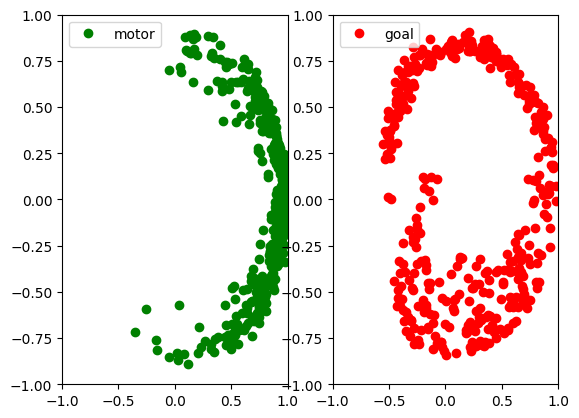

In [9]:
import matplotlib.pyplot as plt

ax_motor = plt.subplot(121)
ax_motor.axis([0, 1, -1, 1])
data = motor_xp.log.scatter_plot(ax_motor, (('sensori', [0, 1]), ), color='green')
legend(('motor', ))

ax_goal = plt.subplot(122)
ax_goal.axis([0, 1, -1, 1])
data = goal_xp.log.scatter_plot(ax_goal, (('sensori', [0, 1]), ), color='red')
legend(('goal', ))

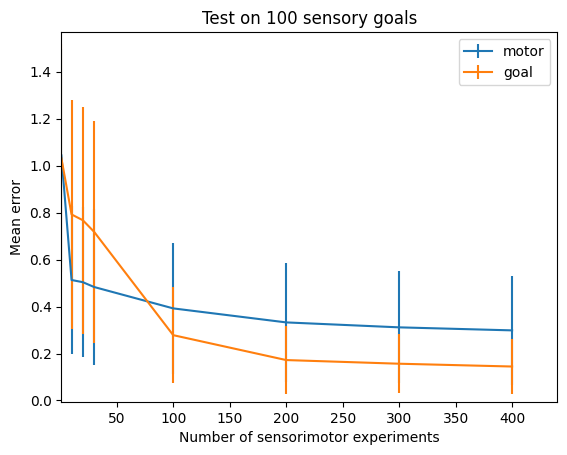

In [10]:
ax = axes()
motor_xp.log.plot_learning_curve(ax)
goal_xp.log.plot_learning_curve(ax)

legend(('motor', 'goal'))

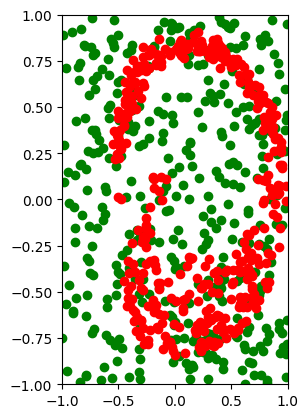

In [13]:
ax_goal = plt.subplot(122)
ax_goal.axis([0, 1, -1, 1])
data = goal_xp.log.scatter_plot(ax_goal, (('choice', [0, 1]), ), color='green')
data = goal_xp.log.scatter_plot(ax_goal, (('sensori', [0, 1]), ), color='red')